In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from matplotlib import gridspec

import gsw as sw
from mpl_toolkits.basemap import Basemap, cm, interp

/Users/archie/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# import data

maxlon = 170.5
minlon = 140

Tok1 = pd.read_csv(r'/Users/archie/Google Drive/o2ar_data/Tokyo1_vSept16.csv', sep = ',')
Tok1['density'] = sw.rho(Tok1['S'].values,Tok1['T'].values,0)
Tok1 = Tok1[(Tok1['Lon']>minlon) & (Tok1['Lon']<maxlon)]

Tok1['dlat'] = np.insert(np.diff(Tok1['Lat']), 0, 0)
Tok1 = Tok1[np.abs(Tok1['dlat'])<0.08]

Tok2 = pd.read_csv(r'/Users/archie/Google Drive/o2ar_data/Tokyo2_vSept16.csv', sep = ',')
Tok2['density'] = sw.rho(Tok2['S'].values,Tok2['T'].values,0)
Tok2 = Tok2[(Tok2['Lon']>minlon) & (Tok2['Lon']<maxlon)]


Tok3 = pd.read_csv(r'/Users/archie/Google Drive/o2ar_data/Tokyo3_vSept16.csv', sep = ',')
Tok3['density'] = sw.rho(Tok3['S'].values,Tok3['T'].values,0)
Tok3 = Tok3[(Tok3['Lon']>minlon) & (Tok3['Lon']<maxlon)]

Tian = pd.read_csv(r'/Users/archie/Google Drive/o2ar_data/Tianjin2_vSept16.csv', sep = ',')
Tian['density'] = sw.rho(Tian['S'].values,Tian['T'].values,0)
Tian = Tian[(Tian['Lon']>minlon) & (Tian['Lon']<maxlon)]

# KM = pd.read_csv(r'/Users/archie/Google Drive/o2ar_data/KM1314_vSept16.csv', sep = ',')
# KM['density'] = sw.rho(KM['S'].values,KM['T'].values,0)
# KM = KM.dropna().reset_index(drop = True)

# ST = pd.read_csv(r'/Users/archie/Google Drive/o2ar_data/STUD08_vSept16.csv', sep = ',')
# ST['density'] = sw.rho(ST['S'].values,ST['T'].values,0)
# ST = ST.dropna().reset_index(drop = True)

print Tian.columns

Index([u'Timestamp', u'Lat', u'Lon', u'S', u'T', u'Fluo', u'TrueO2Ar',
       u'O2Arsat', u'O2Arbiosat', u'MLD (WOA13)', u'Wkn', u'Air-sea flux',
       u'density'],
      dtype='object')


In [3]:
# import MDT data

infile = '../data/mdt/mdt_cnes_cls2013_global.nc'
mdt_data = Dataset(infile, mode='r')

mdt_data.variables

mdt = np.squeeze(mdt_data.variables['mdt'])
lats = mdt_data.variables['lat'][:]
lons = mdt_data.variables['lon'][:]

lon_mdt, lat_mdt = np.meshgrid(lons, lats)

In [4]:
# import MLD data

mld = pd.read_csv('../data/Kuro_MLD.csv', sep = ',')
print mld

    Unnamed: 0         MLD      stdev
0            0   94.728804  19.033362
1            1  105.717395  27.953787
2            2   89.749346  29.646855
3            3   52.222520  18.086776
4            4   28.646069   6.261986
5            5   21.154504   3.309198
6            6   17.461921   2.226160
7            7   17.116623   1.960351
8            8   23.506941   4.002796
9            9   34.825416   6.581476
10          10   48.691740  10.608688
11          11   68.958979  12.629226


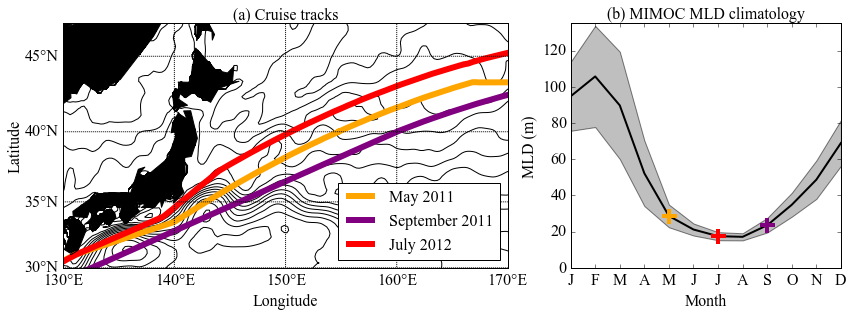

In [8]:
# make map showing where different cruises were

# plot the cruise track and EKE and Rossby radius contours
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

fig0 = plt.figure(1, figsize=(12,4.5), dpi = 300)

gs = gridspec.GridSpec(1, 2, width_ratios=[2.5, 1.5]) 
ax1 = plt.subplot(gs[0])

# m = Basemap(projection='merc',llcrnrlat=15.,urcrnrlat=55,\
#             llcrnrlon=130,urcrnrlon=250,lat_ts=0,resolution='c')
m = Basemap(projection='merc',llcrnrlat=30.,urcrnrlat=47.05,\
            llcrnrlon=130.,urcrnrlon=170.,lat_ts=0,resolution='c', ax = ax1)

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='k',lake_color='white')


palette = plt.get_cmap('YlGnBu_r', 15)
palette.set_bad('w',1.0)


xmT1, ymT1 = m(Tok1['Lon'].values, Tok1['Lat'].values)
xmT3, ymT3 = m(Tok3['Lon'].values, Tok3['Lat'].values)
xmT, ymT = m(Tian['Lon'].values, Tian['Lat'].values)


xii, yii = m(lon_mdt, lat_mdt)
m.contour(xii,yii,mdt,levels = np.arange(-2, 2, 0.1), colors = 'k', lw = 3, zorder = 0)

m.plot(xmT1, ymT1, lw = 6, color='orange', label = 'May 2011', zorder=1)
m.plot(xmT3, ymT3, lw=6, color='purple', label = 'September 2011', zorder=1)
m.plot(xmT, ymT, lw=6, color='red', label = 'July 2012', zorder=1)

m.drawparallels(np.arange(-50,80,5),labels=[1,0,0,0], fontsize=16)
m.drawmeridians(np.arange(-180,180,10),labels=[0,0,0,1], fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
plt.xlabel('Longitude', fontsize =16, labelpad = 25)
plt.ylabel('Latitude', fontsize =16, labelpad = 40)

ll = plt.legend(loc = 'lower right', fontsize=16)
ll.get_frame().set_facecolor('w')

plt.tick_params(axis='both', which='major', labelsize=16)
ax1.set_title('(a) Cruise tracks', fontsize = 16)

ax2 = plt.subplot(gs[1])

ax2.set_title('(b) MIMOC MLD climatology', fontsize = 16)
ax2.set_ylabel('MLD (m)', fontsize = 16)
ax2.set_xlabel('Month', fontsize = 16)
ax2.plot(np.arange(1, 13,1), mld['MLD'], 'k', lw = 2)
ax2.fill_between(np.arange(1, 13,1), mld['MLD']-mld['stdev'], mld['MLD']+mld['stdev'], facecolor='grey', alpha = 0.5)
ax2.axis([1, 12, 0, 135])

ax2.plot(5, mld['MLD'][4],'+', color = 'orange', markersize = 15, mew = 4)
ax2.plot(7, mld['MLD'][6],'+', color = 'red', markersize = 15, mew = 4)
ax2.plot(9, mld['MLD'][8],'+', color = 'purple', markersize = 15, mew = 4)

ax2.set_xticks(np.arange(1,13,1))
ax2.set_xticklabels(labels = ['J','F','M','A','M','J','J','A', 'S','O','N','D']) 

plt.tick_params(labelsize=16)
plt.show()

# fig0.savefig('../manuscript/Figure1.png', bbox_inches='tight', dpi=300)

In [ ]:
# make map showing where different cruises were

# plot the cruise track and EKE and Rossby radius contours
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})


fig1 = plt.figure(1, figsize=(18,12), dpi = 600)

m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=50.01,\
            llcrnrlon=120,urcrnrlon=170,lat_ts=0,resolution='c')

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')

palette = plt.get_cmap('RdYlBu_r', 40)

xmT1, ymT1 = m(Tok1['Lon'].values, Tok1['Lat'].values)
#xmT2, ymT2 = m(Tok2['Lon'].values, Tok2['Lat'].values)
xmT3, ymT3 = m(Tok3['Lon'].values, Tok3['Lat'].values)
xmT, ymT = m(Tian['Lon'].values, Tian['Lat'].values)


m.scatter(xmT1, ymT1, s = 200, c= Tok1['Fluo'].values, vmin=0, vmax = 2.2,cmap = palette, lw=0)#, label = 'May 2011')
m.scatter(xmT3, ymT3, s = 200, c= Tok3['Fluo'].values, vmin=0, vmax = 2.2,cmap = palette, lw=0)#, label = 'September 2011')
m.scatter(xmT, ymT, s = 200, c= Tian['Fluo'].values, vmin=0, vmax = 2.2,cmap = palette,lw=0)# label = 'July 2012')


m.drawparallels(np.arange(-50,80,5),labels=[1,1,0,1], fontsize=24)
m.drawmeridians(np.arange(-180,180,5),labels=[0,0,0,1], fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=24)
plt.tick_params(axis='both', which='minor', labelsize=24)
plt.xlabel('Longitude', fontsize = 24, labelpad = 40)
plt.ylabel('Latitude', fontsize = 24, labelpad = 70)

cb = plt.colorbar(pad = 0.08, fraction =0.03)
cb.ax.tick_params(labelsize=24)

plt.tick_params(axis='both', which='major', labelsize=24)

plt.tick_params(labelsize=24)
plt.show()

#fig1.savefig('../figures/NCP_Map.png', bbox_inches='tight', dpi=600)

In [ ]:
# make T/S plots

ss = np.arange(30, 36, 0.01)
tt = np.arange(0, 30, 0.1)

s, t = np.meshgrid(ss,tt, indexing='ij')
den = sw.rho(s,t,0)

#### Tokyo1 - May 2011
fig2 = plt.figure(2, figsize = (12, 10), dpi = 600)

palette = plt.get_cmap('RdYlBu_r', 40)

CS = plt.contour(s, t, den, 25, colors= 'k', zorder = 2)
plt.clabel(CS, inline=1, fontsize=14)
plt.scatter(Tok1['S'],Tok1['T'], s = 200, lw = 0, c = Tok1['Air-sea flux'], alpha = 0.75, vmin=-20, vmax = 80, cmap = palette, zorder =0)
plt.scatter(Tok3['S'],Tok3['T'], s = 200, lw = 0, c = Tok3['Air-sea flux'], alpha = 0.75, vmin=-20, vmax = 80, cmap = palette, zorder =1)

plt.axis([30, 35, 3, 30])
plt.xlabel('Salinity', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)

plt.title('NCP - May 2011', fontsize=20)
plt.show()

#fig2.savefig('../figures/NCP_May11.png', bbox_inches='tight', dpi=600)

#### Tokyo3 - September 2011
fig3 = plt.figure(1, figsize = (12, 10), dpi = 600)


palette = plt.get_cmap('RdYlBu_r', 40)

CS = plt.contour(s, t, den, 25, colors= 'k', zorder = 1)
plt.clabel(CS, inline=1, fontsize=14)
plt.scatter(Tian['S'],Tian['T'], s = 200, lw = 0, c = Tian['Air-sea flux'], alpha = 0.75, vmin=-20, vmax = 80, cmap = palette, zorder =0)

plt.axis([30, 35, 3, 30])
plt.xlabel('Salinity', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('NCP - July 2012', fontsize=20)
plt.show()

#fig3.savefig('../figures/NCP_July12.png', bbox_inches='tight', dpi=600)

#### Tianjin - July 2012
fig4 = plt.figure(4, figsize = (12, 10), dpi = 600)

palette = plt.get_cmap('RdYlBu_r', 40)

CS = plt.contour(s, t, den, 25, colors= 'k', zorder = 0)
plt.clabel(CS, inline=1, fontsize=14)
plt.scatter(Tok3['S'],Tok3['T'], s = 200, lw = 0, c = Tok3['Air-sea flux'], alpha = 0.75, vmin=-20, vmax = 80, cmap = palette, zorder =1)

plt.axis([30, 35, 3, 30])
plt.xlabel('Salinity', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('NCP - September 2011', fontsize=20)
plt.show()

#fig4.savefig('../figures/NCP_September11.png', bbox_inches='tight', dpi=600)


#fig1.savefig('../figures/prod_TS_highEKE.png', bbox_inches='tight', dpi=600)

In [ ]:
#print Tok3[(Tok3['Lon']>155) & (Tok3['Lon']<160)]

from datetime import datetime, timedelta

matlab_datenum = 734771.2052
python_datetime = datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days = 366)

print python_datetime


In [ ]:
fig5 = plt.figure(5, figsize = (12, 10), dpi = 600)

plt.plot(Tok1['S'], Tok1['Air-sea flux']/np.mean(Tok1['Air-sea flux']), '.k', label = 'May 2011', markersize=10)
plt.plot(Tok3['S'], Tok3['Air-sea flux']/np.mean(Tok3['Air-sea flux']), '.g', label = 'September 2011', markersize=10)
plt.plot(Tian['S'], Tian['Air-sea flux']/np.mean(Tian['Air-sea flux']), '.y', label = 'July 2012', markersize=10)

plt.legend(loc = 'upper left', fontsize =20)
plt.axis([31,35,-2,10])
plt.show()

In [ ]:
# make map showing where different cruises were

# plot the cruise track and EKE and Rossby radius contours
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})


fig1 = plt.figure(1, figsize=(18,12), dpi = 600)

m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=50.01,\
            llcrnrlon=120,urcrnrlon=170,lat_ts=0,resolution='c')

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')

palette = plt.get_cmap('RdYlBu_r', 40)

xmT1, ymT1 = m(Tok1['Lon'].values, Tok1['Lat'].values)
#xmT2, ymT2 = m(Tok2['Lon'].values, Tok2['Lat'].values)
xmT3, ymT3 = m(Tok3['Lon'].values, Tok3['Lat'].values)
xmT, ymT = m(Tian['Lon'].values, Tian['Lat'].values)


m.scatter(xmT1, ymT1, s = 200, c= Tok1['T'].values, vmin=5, vmax = 35,cmap = palette, lw=0)#, label = 'May 2011')
m.scatter(xmT3, ymT3, s = 200, c= Tok3['T'].values, vmin=5, vmax = 35,cmap = palette, lw=0)#, label = 'September 2011')
m.scatter(xmT, ymT, s = 200, c= Tian['T'].values, vmin=5, vmax = 35,cmap = palette,lw=0)# label = 'July 2012')


m.drawparallels(np.arange(-50,80,5),labels=[1,1,0,1], fontsize=24)
m.drawmeridians(np.arange(-180,180,5),labels=[0,0,0,1], fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=24)
plt.tick_params(axis='both', which='minor', labelsize=24)
plt.xlabel('Longitude', fontsize = 24, labelpad = 40)
plt.ylabel('Latitude', fontsize = 24, labelpad = 70)

cb = plt.colorbar(pad = 0.08, fraction =0.03)
cb.ax.tick_params(labelsize=24)

plt.tick_params(axis='both', which='major', labelsize=24)

plt.tick_params(labelsize=24)
plt.show()

#fig1.savefig('../figures/T_Map.png', bbox_inches='tight', dpi=600)

In [ ]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4), dpi = 300)

palette = plt.get_cmap('RdYlBu_r', 40)

class nf(float):
    def __repr__(self):
        str = '%.1f' % (self.__float__(),)
        if str[-1] == '0':
            return '%.0f' % self.__float__()
        else:
            return '%.1f' % self.__float__()


CS = ax1.contour(s, t, den-1000, 25, colors= 'k', zorder = 0)

# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r'
else:
    fmt = '%r'
ax1.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)

ax1.scatter(Tok1['S'],Tok1['T'], s = 100, lw = 0, c = Tok1['Air-sea flux'], alpha = 0.75, vmin=-20, vmax = 80, cmap = palette, zorder =1)

ax1.set_xlim([30, 35])
ax1.set_ylim([3, 30])

ax1.set_xlabel('Salinity', fontsize=16)
ax1.set_ylabel('Temperature', fontsize=16)
ax1.tick_params(labelsize=16)


ax1.set_title('May 2011', fontsize=16)

######################################################################################################################################

CS = ax2.contour(s, t, den-1000, 25, colors= 'k', zorder = 0)
ax2.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
cncp = ax2.scatter(Tok3['S'],Tok3['T'], s = 100, lw = 0, c = Tok3['Air-sea flux'], alpha = 0.75, vmin=-20, vmax = 80, cmap = palette, zorder =1)

ax2.set_xlim([30, 35])
ax2.set_ylim([3, 30])

ax2.set_xlabel('Salinity', fontsize=16)
ax2.tick_params(labelsize=16)

ax2.set_title('September 2011', fontsize=16)

######################################################################################################################################

CS = ax3.contour(s, t, den-1000, 25, colors= 'k', zorder = 0)
ax3.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
ax3.scatter(Tian['S'],Tian['T'], s = 100, lw = 0, c = Tian['Air-sea flux'], alpha = 0.75, vmin=-20, vmax = 80, cmap = palette, zorder =1)

ax3.set_xlim([30, 35])
ax3.set_ylim([3, 30])

ax3.set_xlabel('Salinity', fontsize=16)
ax3.tick_params(labelsize=16)

ax3.set_title('July 2012', fontsize=16)

cbar_ax1 = fig2.add_axes([0.33, -0.05, 0.38, 0.05])
mncp = fig2.colorbar(cncp, cax=cbar_ax1, orientation="horizontal")

mncp.set_label('Net Community Production (mmol O$_2$ m$^{-2}$ d$^{-1}$)', fontsize=16, )
mncp.ax.tick_params(labelsize=16)

plt.show()

fig2.savefig('../figures/NCP_TS_MJS.png', dpi = 300, bbox_inches = "tight")